In [1]:
'''
We have a set of ~300 genes with names and scores.

Given an RPKM file, normalize, extract the genes of interest,
and determine score.
'''

'\nWe have a set of ~300 genes with names and scores.\n\nGiven an RPKM file, normalize, extract the genes of interest,\nand determine score.\n'

In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import subprocess

Populating the interactive namespace from numpy and matplotlib


In [2]:
colorset = ['#763C87','#1FA2F4','#0569CE','#F48C36','#E54028']
greens = ['#37535e', '#3b748a', '#4095b5', '#52aec9', '#72bfc4', '#93d0bf']

mpl.rcParams.update({
'backend': 'MacOSX',
'text.usetex': 'false',
'font.family': 'Myriad Pro',
'font.size': 18, 
'figure.subplot.hspace': .4,
'figure.subplot.bottom': 0.125, 
'savefig.dpi': 600,
'savefig.format': 'pdf', 
'pdf.fonttype': 42,
'figure.edgecolor': (1, 1, 1, 0), 
'figure.facecolor': (1, 1, 1, 0), 
'figure.figsize': (15.0, 10.0),
'font.weight': 'bold',
'axes.labelweight': 'bold',
'axes.titlesize': 36,
'lines.markersize': 11.200000000000001,
 'ytick.major.width': 1.6,
 'xtick.major.width': 1.6,
 'lines.markeredgewidth': 0.0,
 'xtick.major.pad': 11.200000000000001,
 'ytick.minor.width': 0.8,
 'grid.linewidth': 1.6,
 'lines.linewidth': 2.8000000000000003,
 'ytick.major.pad': 11.200000000000001,
})

In [3]:
gse = 'and'
filename = '../../data/mean/rpkm.txt'
data = pd.io.parsers.read_csv(filename, 
                                    sep='\t', 
                                    header=0, index_col=0)

print(data.shape)

# Get gene column
data['Gene symbol'] = [s.split('|')[0] for s in data['Annotation/Divergence']]

cols = ['No-Peptide-24h',
        '10uM-K99A-24h', 
        '100uM-K99A-24h', 
        '0-1uM-PCC-24h', 
        '10uM-PCC-24h', 
        ]
meki_cols = [s + '-MEKi' for s in cols]
labels = ['No Peptide', '10uM K99A', '100uM K99A', '0.1uM PCC', '10uM PCC']
data.head()

(20474, 32)


,chr,start,end,strand,Length,Copies,Annotation/Divergence,0-1uM-PCC-24h-1,100uM-K99A-24h-1,10uM-K99A-24h-1,...,No-Peptide-24h-std,10uM-K99A-24h,10uM-K99A-24h-std,100uM-K99A-24h,100uM-K99A-24h-std,0-1uM-PCC-24h,0-1uM-PCC-24h-std,10uM-PCC-24h,10uM-PCC-24h-std,Gene symbol
id,,,,,,,,,,,,,,,,,,,,,
NM_013478,chr5,137981521,137990232,+,1308,1,Azgp1|Zag|-|5 G2|5 76.92 cM|protein-coding,0.000,0.000,0.000,...,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,Azgp1
NM_172784,chr10,7589800,7625477,+,3388,1,Lrp11|1700034J19Rik|6330533B21|9830160H19Rik|-...,1.027,1.688,1.062,...,0.072832,0.8530,0.295571,1.3405,0.491439,1.0895,0.088388,0.9210,0.005657,Lrp11
NM_007732,chr19,47646341,47692042,-,5373,1,Col17a1|BP180|Bpag|Bpag2|-|19 D1|19 40.07 cM|p...,0.000,0.000,0.008,...,0.058690,0.0040,0.005657,0.0095,0.013435,0.0090,0.012728,0.0105,0.014849,Col17a1
NM_016772,chr7,28825338,28832239,+,1126,1,Ech1|AA617331|-|7 A3|7|protein-coding,23.820,34.892,39.810,...,7.484725,36.6585,4.456894,29.7200,7.314313,25.7330,2.705391,28.8205,1.897167,Ech1
NM_172858,chr2,136081088,136387967,-,4761,1,Pak7|2900083L08Rik|6430627N20|Pak5|RP23-88O15....,0.000,0.000,0.000,...,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.0040,0.005657,Pak7


In [4]:
# Get alternating columns
cols_ordered = cols #[item for sublist in zip(cols, meki_cols) for item in sublist]
cols_ordered

['No-Peptide-24h',
 '10uM-K99A-24h',
 '100uM-K99A-24h',
 '0-1uM-PCC-24h',
 '10uM-PCC-24h']

In [5]:
subdata = data[['Gene symbol'] + cols_ordered]
filename = 'data/{}_gene_values.txt'.format(gse)
subdata.to_csv(filename,
               header=True, index=False, sep='\t')
scores = subprocess.check_output('python ../calculate_activation_signature_score.py -f ' +
                                '{}'.format(filename), shell=True)
print(scores)

b'Activation scores:\nno-peptide-24h   -1.000000\n10um-k99a-24h    -0.237692\n100um-k99a-24h    0.314645\n0-1um-pcc-24h     0.377151\n10um-pcc-24h      0.545897\ndtype: float64\n'


In [6]:
import sys
sys.path.append('../')
from calculate_activation_signature_score import ActivationOptionParser

parser = ActivationOptionParser()
filename = 'data/{}_gene_values.txt'.format(gse)
scores = parser.scores_from_file(filename)


In [7]:
# Get sets of two
color_groups = zip(colorset, colorset)

# Flatten
color_groups = [item for sublist in color_groups for item in sublist]

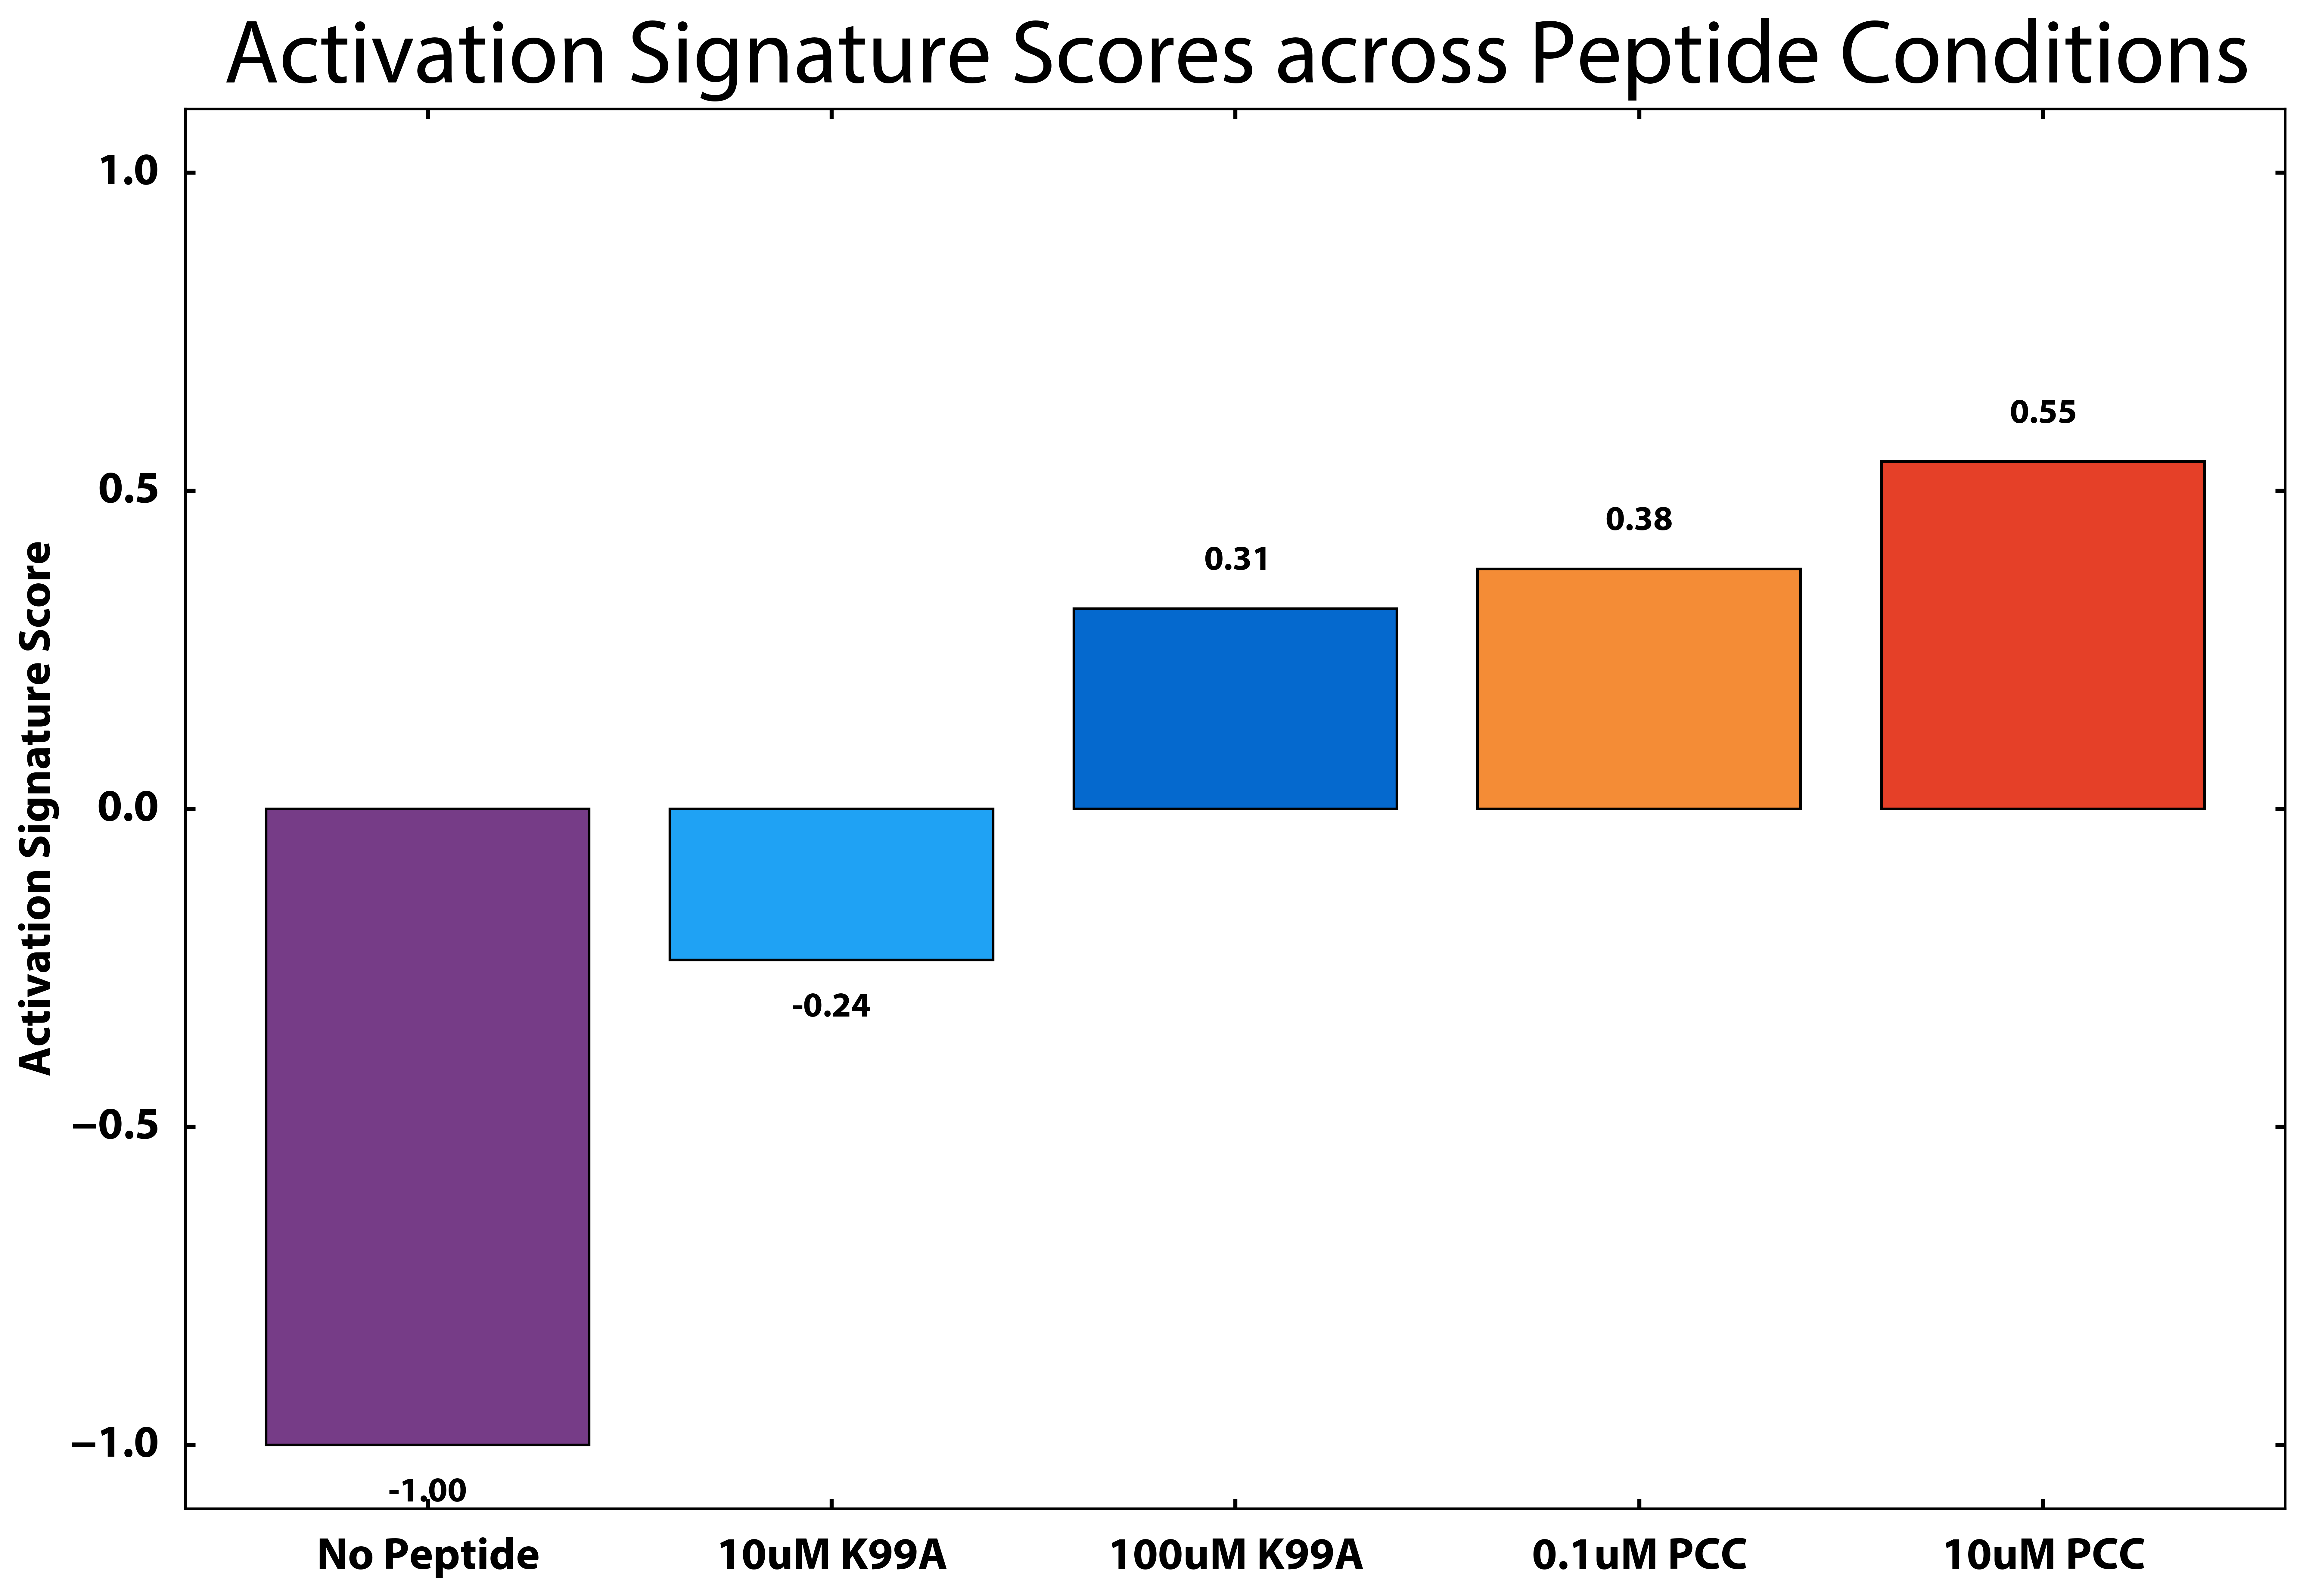

In [8]:
x_range = range(0, len(scores))
plt.figure()

bars = plt.bar([x + .2 for x in x_range], scores, color=list(colorset))

# Label scores above bars
for i, score in enumerate(scores):
    if score < 0:
        align = 'top'
        height = score - .05
    else: 
        align = 'bottom'
        height = score + .05
    plt.text(i + .6, height, '%.2f' % score,
                ha='center', va=align, fontsize=14)

plt.ylim([-1.1, 1.1])
plt.xlim([0, len(scores) + .2])
plt.ylabel('Activation Signature Score')

plt.xticks([x + .6 for x in x_range], labels)

title_str = 'Activation Signature Scores across Peptide Conditions'
plt.title(title_str, y=1.01)
plt.savefig('figures/{}'.format(title_str.replace(' ', '_')), bbox_inches='tight')